<a href="https://colab.research.google.com/github/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/blob/main/HW3/HW3_ML_9_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOMEWORK 3: DEEP LEARNING

## RESOURCES USED TO LEARN THE TENSORFLOW FRAMEWORK

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

## PROJECT DESIGN AND IMPLEMENTATION

The objective of this pronject is to develop a Neural Network to classify clothing articles based on images. The data set is provided by Zalando which is a publicly traded German online retailer of clothing articles. The data set contains 70000 images with the associated classification label. Each image is given as a 28x28 grayscale format. Each pixel is represented by single pixel-value indicating the lightness or darkness of the pixel. The higher the number the darker the pixel is. The pixel value is an integer between 0 and 255. The data set can be downloaded from this link [Data](https://github.com/zalandoresearch/fashion-mnist)

### EXPLORATORY DATA ANALYSIS

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X = np.concatenate((X_train,X_test), axis=0)
y = np.concatenate((y_train,y_test), axis=0)
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

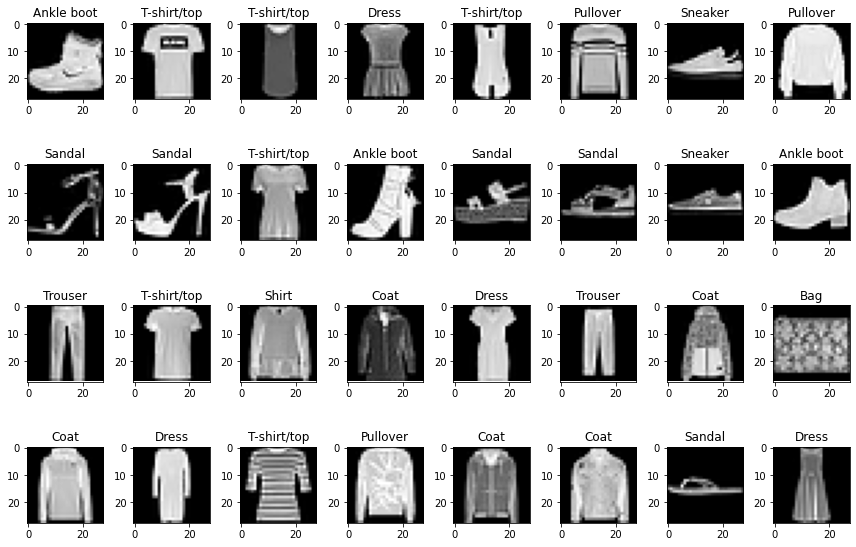

In [37]:
# specify the number of rows and columns you want to see
num_row = 4
num_col = 8

# get a segment of the dataset
num = num_row*num_col
images = X[:num]
labels = y[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('{}'.format(class_names[labels[i]]))
plt.tight_layout()
plt.show()

Here, we can see a sample of the data set. The data set are images of 10 different clothing articles in grey scale. The labels goes from 0 to 9 and the definition is as follows:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

Based on the images, one can expect different challenges. The clothing articles coat, pullover, dress and t-shirt/top are similar and even a human can made some errors labeling those articles. The same comment applies to sneaker, sanda and angle boat. On the other hand, trouser and bag may be easier to identify. These comments are based from a human perspective. During the analysis these comments will be verified. Nevertheless anticipating possible problems it is a good practice to planned areas to improved on. 

In [119]:
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 7000]
 [   1 7000]
 [   2 7000]
 [   3 7000]
 [   4 7000]
 [   5 7000]
 [   6 7000]
 [   7 7000]
 [   8 7000]
 [   9 7000]]


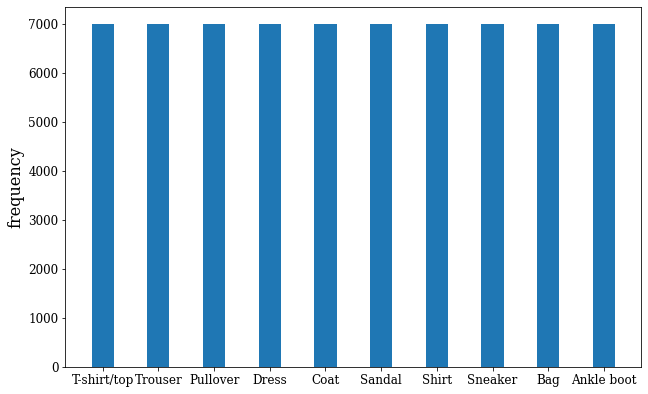

In [128]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = counts
ax.bar(class_names,students,0.4)
fontdict={  'fontsize': 16, 'fontname': 'serif'}
ax.set_ylabel('frequency',fontdict)
for tick in ax.get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in ax.get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
plt.show()

This bar graph shows the data distribution among the labels. The data set is evenly distributed among each clothing article. Each label has 7000 examples.

### TRAIN-DEV-TEST SPLIT

Here we will pre-process the data. The data is initially given as a train and test set. However, for this project we want to split the data in three parts: training, validation and test data sets. Also, the pixel-values should be normalized. In this work, they will be normalized to have a range between 0 and 1, therefore all the pixel values will be divided by 255. 

In [3]:
# loading the data
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X = np.concatenate((X_train,X_test), axis=0)
y = np.concatenate((y_train,y_test), axis=0)
X = X/255.0


In addition the data should be shuffle before it is used to train the Neural network.  Finally, the data is splitted in three parts as follows: 80% to the training data set and 10% for both the validation and test data set. 

In [4]:
np.random.seed(42)
A = np.arange(0,69999)
np.random.shuffle(A)
train, validate, test = np.split(A,[int(.8*len(A)), int(.9*len(A))])
X_train = X[train]
X_val = X[validate]
X_test = X[test]
y_train = y[train]
y_val = y[validate]
y_test = y[test]
print('X_train shape is: ' + str(X_train.shape))
print('X_val shape is:  '  + str(X_val.shape))
print('X_test shape is:  '  + str(X_test.shape))
print('y_train shape is: ' + str(y_train.shape))
print('y_val shape is:  '  + str(y_val.shape))
print('y_test shape is:  '  + str(y_test.shape))

X_train shape is: (55999, 28, 28)
X_val shape is:  (7000, 28, 28)
X_test shape is:  (7000, 28, 28)
y_train shape is: (55999,)
y_val shape is:  (7000,)
y_test shape is:  (7000,)


### FORWARD PROPAGATION IMPLEMENTATION

In this step, I will define the architecture of the Neural Network. The architecture of the Neural Network is composed of two layers as follows:
 * 1 hidden layer with 128 nodes and the rectified linear activation function (ReLU) is used as the activation function for this layer. ReLU is a piecewise linear function that will output the input directly if it positive, otherwise, it will output zero. 
 * The second layer is the output layer with 10 nodes since we have 10 different class labels. The activation function is the softmax function which will give us the associated probability of each class for a particular test set
 * Note that there is an initial layer if the code, however it has no effect on the Neural Network analysis. The initial layer is reshaping the image data from a 28x28 matrix to a 1D vector. 

In [137]:
del model
model = tf.keras.models.Sequential([ 
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(128, activation='relu'),    
  tf.keras.layers.Dense(10, activation='softmax')     
])

In [113]:
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 128)               100480    
                                                                 
 dense_29 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


### DEFINING COST FUNCTION AND GRADIENT DESCENT IMPLEMENTATION

For this work, the Sparse Categorical Cross entropy is used as the loss function. The hyperparameters are trained using the gradient descent algorithm and the Adam optimization is applied. The metric used to evaluate this ML model is accuracy. The accuracy is the ratio between the corrected predictions over the number of test instances. This metric is selected since there is no particular reason to prioratize recall or precision over the predictions. A miss-classification of a particular label is as important as other labels. 

In [114]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Finally the model is trained with the train data set. 

In [115]:
history = model.fit(X_train, y_train, epochs=5, batch_size=2**10)

Epoch 1/5
55/55 [==============================] - 1s 13ms/step - loss: 0.8802 - accuracy: 0.7121
Epoch 2/5
55/55 [==============================] - 1s 13ms/step - loss: 0.5131 - accuracy: 0.8266
Epoch 3/5
55/55 [==============================] - 1s 13ms/step - loss: 0.4579 - accuracy: 0.8439
Epoch 4/5
55/55 [==============================] - 1s 13ms/step - loss: 0.4256 - accuracy: 0.8541
Epoch 5/5
55/55 [==============================] - 1s 13ms/step - loss: 0.4065 - accuracy: 0.8597


In [116]:
loss = history.history['loss']
accuracy = history.history['accuracy']

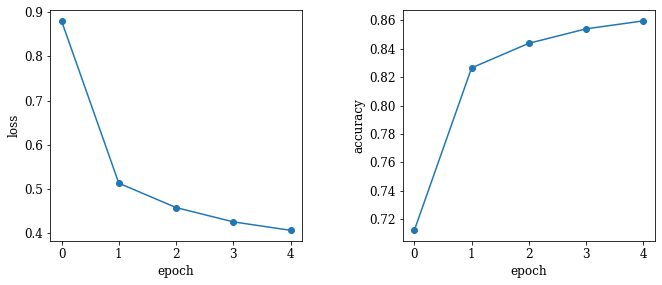

In [117]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
fig.subplots_adjust(wspace=0.4,hspace=0,left=0.2, right=0.9, top=0.9, bottom=0.1)
fontdict={  'fontsize': 12, 'fontname': 'serif'}
axes[0].plot(loss,'-o')
axes[0].set_xlabel('epoch',fontdict)
axes[0].set_ylabel('loss',fontdict)
#axes[0].set_ylim(0.14, 0.18)

axes[1].plot(accuracy,'-o')
axes[1].set_xlabel('epoch',fontdict)
axes[1].set_ylabel('accuracy',fontdict)
#axes[1].set_ylim(0.94, 0.95)


for tick in axes[0].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[0].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

for tick in axes[1].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[1].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

In this figure we can see how the loss is decreasing as the number of epoch increases. On the other hand the accuracy is also increasing as the number of epoch increases. However, neither the loss nor the accuracy are settling, this is an indicator that we may be underfitting the data. Nevertheless, the hyperparameter tunning will be done in future sections of this work. 

### PRESENTING RESULTS BASED ON TEST SET

The accuracy metric computed before was based on the training data set, however the metric should be computed on the test data set. 

In [118]:
loss, acc = model.evaluate(X_test, y_test, verbose = 1)
print('Test accuracy: ', acc)

219/219 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8573
Test accuracy:  0.857285737991333


An accuracy of 0.86 (86%) was obtained using the test data set. This means that 6300 out of 7000 examples were classified correctly. Note that the validation data set has not been used. This is because the hyperparameters tunning have not been done. The following section will take care of that. 

### TUNNING AND DISCUSSION OF ARCHITECTURE, HYPERPARAMETERS AND OPTIMIZATION FEATURES

### HIDDEN LAYERS EFFECT

Lets start by changing the Neural Network architecture of the problem. Before a 2 layer Neural Network was defined. In this case, the Neural Network will have **3 hidden layers** with the relu activation function, the number of nodes associated with each layer is 128. The output layer will remain as before (10 nodes and softmax activation function). 

In [138]:
del model
model = tf.keras.models.Sequential([ 
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),        
  tf.keras.layers.Dense(128, activation='relu'),    
  tf.keras.layers.Dense(10, activation='softmax')     
])

In [141]:
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 128)               100480    
                                                                 
 dense_37 (Dense)            (None, 128)               16512     
                                                                 
 dense_38 (Dense)            (None, 128)               16512     
                                                                 
 dense_39 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________
None


In [139]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [140]:
history = model.fit(X_train, y_train, epochs=5, batch_size=2**10)

Epoch 1/5
55/55 [==============================] - 1s 18ms/step - loss: 0.9141 - accuracy: 0.6885
Epoch 2/5
55/55 [==============================] - 1s 18ms/step - loss: 0.4828 - accuracy: 0.8302
Epoch 3/5
55/55 [==============================] - 1s 18ms/step - loss: 0.4243 - accuracy: 0.8505
Epoch 4/5
55/55 [==============================] - 1s 18ms/step - loss: 0.3908 - accuracy: 0.8615
Epoch 5/5
55/55 [==============================] - 1s 20ms/step - loss: 0.3735 - accuracy: 0.8672


In [142]:
loss = history.history['loss']
accuracy = history.history['accuracy']

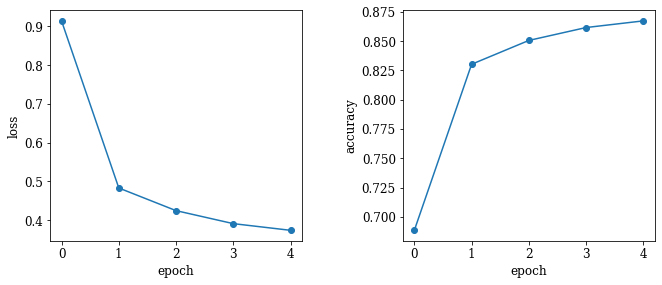

In [143]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
fig.subplots_adjust(wspace=0.4,hspace=0,left=0.2, right=0.9, top=0.9, bottom=0.1)
fontdict={  'fontsize': 12, 'fontname': 'serif'}
axes[0].plot(loss,'-o')
axes[0].set_xlabel('epoch',fontdict)
axes[0].set_ylabel('loss',fontdict)
#axes[0].set_ylim(0.14, 0.18)

axes[1].plot(accuracy,'-o')
axes[1].set_xlabel('epoch',fontdict)
axes[1].set_ylabel('accuracy',fontdict)
#axes[1].set_ylim(0.94, 0.95)


for tick in axes[0].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[0].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

for tick in axes[1].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[1].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

In [144]:
# test the model on validation data
loss, acc = model.evaluate(X_val, y_val, verbose = 1)
print('\nTest accuracy: ', acc)

219/219 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8676

Test accuracy:  0.8675714135169983


For this Neural Network with three hidden layers, the loss and accuracy values obtained are 0.37 and 0.87, respectively. These are slightly better results with respect to the model with a single hidden layer. Similar values are obtained when the validation set is used. This is an indication that the data is well distributed among the validation and training data sets, in addition to the fact that the data set is big. 

I will again increase the number of layers of the Neural Network. the Neural Network will have **5 hidden layers** with the relu activation function, the number of nodes associated with each layer is 128. The output layer will remain as before (10 nodes and softmax activation function). 

In [145]:
del model
model = tf.keras.models.Sequential([ 
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),        
  tf.keras.layers.Dense(128, activation='relu'),    
  tf.keras.layers.Dense(10, activation='softmax')     
])

In [146]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [147]:
history = model.fit(X_train, y_train, epochs=5, batch_size=2**10)

Epoch 1/5
55/55 [==============================] - 2s 25ms/step - loss: 0.8959 - accuracy: 0.6916
Epoch 2/5
55/55 [==============================] - 1s 23ms/step - loss: 0.4757 - accuracy: 0.8328
Epoch 3/5
55/55 [==============================] - 1s 23ms/step - loss: 0.4214 - accuracy: 0.8503
Epoch 4/5
55/55 [==============================] - 1s 22ms/step - loss: 0.3874 - accuracy: 0.8603
Epoch 5/5
55/55 [==============================] - 1s 23ms/step - loss: 0.3595 - accuracy: 0.8701


In [148]:
loss = history.history['loss']
accuracy = history.history['accuracy']

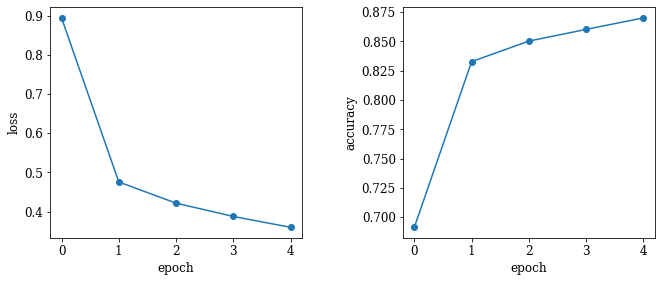

In [149]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
fig.subplots_adjust(wspace=0.4,hspace=0,left=0.2, right=0.9, top=0.9, bottom=0.1)
fontdict={  'fontsize': 12, 'fontname': 'serif'}
axes[0].plot(loss,'-o')
axes[0].set_xlabel('epoch',fontdict)
axes[0].set_ylabel('loss',fontdict)
#axes[0].set_ylim(0.14, 0.18) 

axes[1].plot(accuracy,'-o')
axes[1].set_xlabel('epoch',fontdict)
axes[1].set_ylabel('accuracy',fontdict)
#axes[1].set_ylim(0.94, 0.95)


for tick in axes[0].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[0].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

for tick in axes[1].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[1].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

In [ ]:
# test the model on validation data
loss, acc = model.evaluate(X_val, y_val, verbose = 1)
print('\nTest accuracy: ', acc)

219/219 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8676

Test accuracy:  0.8675714135169983


For this Neural Network with 5 hidden layers, the loss and accuracy values obtained are 0.39 and 0.87, respectively. These values are almost the same results with respect to the model with 3 hidden layers. This is an indication that adding more layers to the data set will not improve the performance of the model and may lead to overfitting issues. 

### NUMBER OF NODES EFFECT

The number of nodes per each layer will be increased in this step. this Neural Network have **5 hidden layers** with the relu activation function and the number of nodes associated with each layer, from layer 1 to 6 is 512, 256, 128, 64, 32, 10. The output layer will remain as before (10 nodes and softmax activation function). Note that the input layer have 784 units, therefore it is generaly not recommended to have a hidden layer with more nodes than the input layer

In [7]:
model = tf.keras.models.Sequential([ 
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),        
  tf.keras.layers.Dense(32, activation='relu'),    
  tf.keras.layers.Dense(10, activation='softmax')     
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=5, batch_size=2**10)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


55/55 [==============================] - 3s 38ms/step - loss: 0.8421 - accuracy: 0.7107
Epoch 2/5
55/55 [==============================] - 2s 38ms/step - loss: 0.4660 - accuracy: 0.8351
Epoch 3/5
55/55 [==============================] - 2s 39ms/step - loss: 0.4022 - accuracy: 0.8560
Epoch 4/5
55/55 [==============================] - 2s 38ms/step - loss: 0.3704 - accuracy: 0.8677
Epoch 5/5
55/55 [==============================] - 2s 39ms/step - loss: 0.3423 - accuracy: 0.8769


In [10]:
loss = history.history['loss']
accuracy = history.history['accuracy']

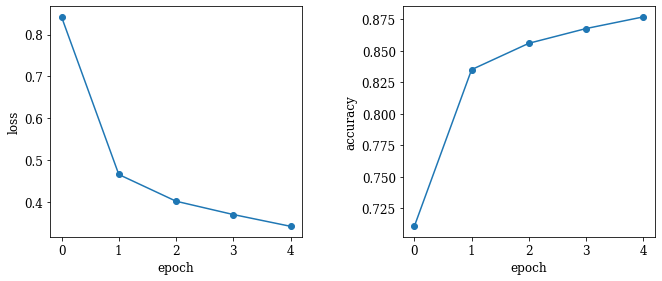

In [11]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
fig.subplots_adjust(wspace=0.4,hspace=0,left=0.2, right=0.9, top=0.9, bottom=0.1)
fontdict={  'fontsize': 12, 'fontname': 'serif'}
axes[0].plot(loss,'-o')
axes[0].set_xlabel('epoch',fontdict)
axes[0].set_ylabel('loss',fontdict)
#axes[0].set_ylim(0.14, 0.18) 

axes[1].plot(accuracy,'-o')
axes[1].set_xlabel('epoch',fontdict)
axes[1].set_ylabel('accuracy',fontdict)
#axes[1].set_ylim(0.94, 0.95)


for tick in axes[0].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[0].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

for tick in axes[1].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[1].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

In [12]:
# test the model on validation data
loss, acc = model.evaluate(X_val, y_val, verbose = 1)
print('\nTest accuracy: ', acc)

219/219 [==============================] - 1s 2ms/step - loss: 0.3553 - accuracy: 0.8746

Test accuracy:  0.8745714426040649


For this Neural Network the number of nodes were increased, the loss and accuracy values obtained are 0.35 and 0.87, respectively. These values are almost the same results with respect to the model with 5 hidden layers and less nodes. This is an indication that adding more nodes to the hidden layers set will not improve the performance of the model and, actually may lead to overfitting issues.

### EFFECT OF ACTIVATION FUNCTION

For this NN, the architecture will be the same as the previous model but the activation function for the hidden layers will be the sigmoid function.

In [24]:
del model
model = tf.keras.models.Sequential([ 
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(128, activation='sigmoid'),        
  tf.keras.layers.Dense(128, activation='sigmoid'),    
  tf.keras.layers.Dense(10, activation='softmax')     
])

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, epochs=5, batch_size=2**10)

Epoch 1/5
55/55 [==============================] - 1s 16ms/step - loss: 2.2905 - accuracy: 0.1524
Epoch 2/5
55/55 [==============================] - 1s 16ms/step - loss: 1.6322 - accuracy: 0.3209
Epoch 3/5
55/55 [==============================] - 1s 16ms/step - loss: 1.2263 - accuracy: 0.4763
Epoch 4/5
55/55 [==============================] - 1s 16ms/step - loss: 1.0668 - accuracy: 0.5037
Epoch 5/5
55/55 [==============================] - 1s 16ms/step - loss: 0.9156 - accuracy: 0.6410


In [27]:
loss = history.history['loss']
accuracy = history.history['accuracy']

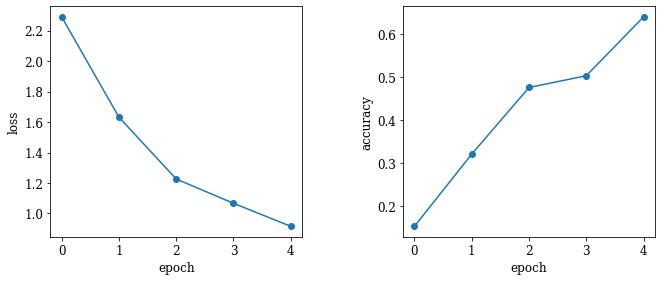

In [28]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
fig.subplots_adjust(wspace=0.4,hspace=0,left=0.2, right=0.9, top=0.9, bottom=0.1)
fontdict={  'fontsize': 12, 'fontname': 'serif'}
axes[0].plot(loss,'-o')
axes[0].set_xlabel('epoch',fontdict)
axes[0].set_ylabel('loss',fontdict)
#axes[0].set_ylim(0.14, 0.18) 

axes[1].plot(accuracy,'-o')
axes[1].set_xlabel('epoch',fontdict)
axes[1].set_ylabel('accuracy',fontdict)
#axes[1].set_ylim(0.94, 0.95)


for tick in axes[0].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[0].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

for tick in axes[1].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[1].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

In [29]:
# test the model on validation data
loss, acc = model.evaluate(X_val, y_val, verbose = 1)
print('\nTest accuracy: ', acc)

219/219 [==============================] - 0s 1ms/step - loss: 0.8253 - accuracy: 0.6831

Test accuracy:  0.6831428408622742


For this Neural Network the number of nodes were increased, the loss and accuracy values obtained are 0.83 and 0.68, respectively. These values are significantly worse with respect to the NN using the relu function.

### EFFECT OF NUMBER OF EPOCHS

In [50]:
LOSS = np.zeros(8,)
ACC = np.zeros(8,)
LOSS_t = np.zeros(8,)
ACC_t = np.zeros(8,)
for i in range(0,8,1):
    del model
    model = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),        
    tf.keras.layers.Dense(128, activation='relu'),    
    tf.keras.layers.Dense(10, activation='softmax')     
    ])
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5+2**i, batch_size=2**10)
    loss = history.history['loss']
    accuracy = history.history['accuracy']
    # test the model on validation data
    loss, acc = model.evaluate(X_val, y_val, verbose = 1)
    LOSS[i] = loss
    ACC[i] = acc
    loss, acc = model.evaluate(X_train, y_train, verbose = 1)
    LOSS_t[i] = loss
    ACC_t[i] = acc
    print('\nTest accuracy: ', acc)

Epoch 1/6
55/55 [==============================] - 1s 16ms/step - loss: 0.9263 - accuracy: 0.6796
Epoch 2/6
55/55 [==============================] - 1s 17ms/step - loss: 0.4812 - accuracy: 0.8276
Epoch 3/6
55/55 [==============================] - 1s 16ms/step - loss: 0.4297 - accuracy: 0.8474
Epoch 4/6
55/55 [==============================] - 1s 17ms/step - loss: 0.3849 - accuracy: 0.8629
Epoch 5/6
55/55 [==============================] - 1s 16ms/step - loss: 0.3641 - accuracy: 0.8693
Epoch 6/6
1750/1750 [==============================] - 2s 1ms/step - loss: 0.3239 - accuracy: 0.8842

Test accuracy:  0.8842479586601257
Epoch 1/7
55/55 [==============================] - 1s 16ms/step - loss: 0.9236 - accuracy: 0.6824
Epoch 2/7
55/55 [==============================] - 1s 16ms/step - loss: 0.4821 - accuracy: 0.8304
Epoch 3/7
55/55 [==============================] - 1s 16ms/step - loss: 0.4237 - accuracy: 0.8477
Epoch 4/7
55/55 [==============================] - 1s 16ms/step - loss: 0.3807 

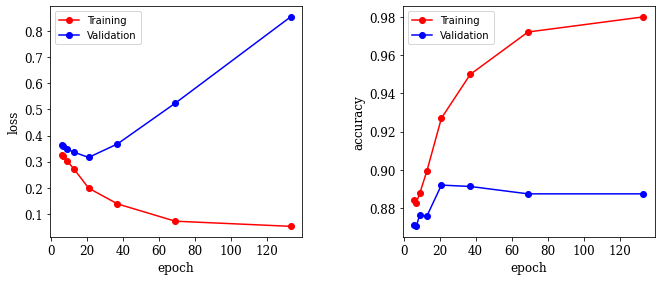

In [62]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
fig.subplots_adjust(wspace=0.4,hspace=0,left=0.2, right=0.9, top=0.9, bottom=0.1)
fontdict={  'fontsize': 12, 'fontname': 'serif'}
axes[0].plot(5+2**(np.arange(0,8,1)),LOSS_t,'-ro',label='Training')
axes[0].plot(5+2**(np.arange(0,8,1)),LOSS,'-bo',label='Validation')
axes[0].set_xlabel('epoch',fontdict)
axes[0].set_ylabel('loss',fontdict)
#axes[0].set_ylim(0.14, 0.18) 
axes[0].legend()

axes[1].plot(5+2**(np.arange(0,8,1)),ACC_t,'-ro',label='Training')
axes[1].plot(5+2**(np.arange(0,8,1)),ACC,'-bo',label='Validation')
axes[1].set_xlabel('epoch',fontdict)
axes[1].set_ylabel('accuracy',fontdict)
#axes[1].set_ylim(0.94, 0.95)
axes[1].legend()

for tick in axes[0].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[0].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

for tick in axes[1].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[1].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

The figure shows the effect of the number of epoch on the loss and accuracy of the NN model. For small values of epoch (0 to 20) the performance of the model increases as the number of epoch increases for both the validation and the trianing set. However, after 20 epochs the performance on the training increases while the performance of the model for the validation set decreases. This is a clear sign of overfitting. Therefore, a number of epoch equal to 20 is selected for this problem. 

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [63]:
    model = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),        
    tf.keras.layers.Dense(128, activation='relu'),    
    tf.keras.layers.Dense(10, activation='softmax')     
    ])
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=20, batch_size=2**10)
    loss = history.history['loss']
    accuracy = history.history['accuracy']
    # test the model on validation data
    loss, acc = model.evaluate(X_val, y_val, verbose = 1)
    print('\nTest accuracy: ', acc)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


55/55 [==============================] - 1s 17ms/step - loss: 0.9171 - accuracy: 0.6807
Epoch 2/20
55/55 [==============================] - 1s 17ms/step - loss: 0.4798 - accuracy: 0.8291
Epoch 3/20
55/55 [==============================] - 1s 17ms/step - loss: 0.4188 - accuracy: 0.8501
Epoch 4/20
55/55 [==============================] - 1s 17ms/step - loss: 0.3854 - accuracy: 0.8616
Epoch 5/20
55/55 [==============================] - 1s 17ms/step - loss: 0.3632 - accuracy: 0.8679
Epoch 6/20
55/55 [==============================] - 1s 17ms/step - loss: 0.3391 - accuracy: 0.8768
Epoch 7/20
55/55 [==============================] - 1s 16ms/step - loss: 0.3228 - accuracy: 0.8825
Epoch 8/20
55/55 [==============================] - 1s 17ms/step - loss: 0.3108 - accuracy: 0.8869
Epoch 9/20
55/55 [==============================] - 1s 16ms/step - loss: 0.3003 - accuracy: 0.8905
Epoch 10/20
55/55 [==============================] - 1s 17ms/step - loss: 0.2911 - accuracy: 0.8941
Epoch 11/20
55/55 [=

We can now evaluate the model for the test data set. This data set has not been used previously in any case.

In [64]:
    loss, acc = model.evaluate(X_test, y_test, verbose = 1)
    print('\nTest accuracy: ', acc)

219/219 [==============================] - 0s 1ms/step - loss: 0.3242 - accuracy: 0.8856

Test accuracy:  0.8855714201927185


Finally, an accuracy equal to 89% is reached.

## BASELINE MODEL

In [34]:
from sklearn.linear_model import LogisticRegression
X_train_log = X_train.flatten().reshape(55999,784)
X_val_log = X_val.flatten().reshape(7000,784)
X_test_log = X_test.flatten().reshape(7000,784)

In [35]:
score = np.zeros(5,)
for i in range(0,5,1):
  Logistic_model = LogisticRegression(solver='sag',multi_class='auto',max_iter=1+i*10).fit(X_train_log,y_train)
  # Use score method to get accuracy of model
  score[i] = Logistic_model.score(X_val_log, y_val)
  print(score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[0.81957143 0.         0.         0.         0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[0.81957143 0.84971429 0.         0.         0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[0.81957143 0.84971429 0.854      0.         0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[0.81957143 0.84971429 0.854      0.85342857 0.        ]
[0.81957143 0.84971429 0.854      0.85342857 0.85342857]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


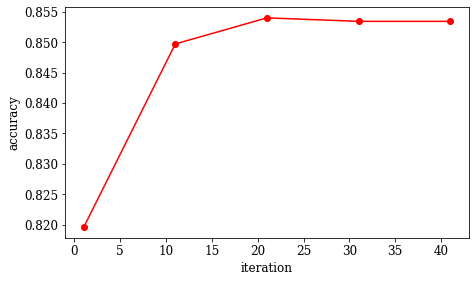

In [37]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(8,4))
fig.subplots_adjust(wspace=0.4,hspace=0,left=0.2, right=0.9, top=0.9, bottom=0.1)
fontdict={  'fontsize': 12, 'fontname': 'serif'}
axes.plot(1+(np.arange(0,5,1))*10,score,'-ro',label='Training')
axes.set_xlabel('iteration',fontdict)
axes.set_ylabel('accuracy',fontdict)

for tick in axes.get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes.get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

The figure shows the effect of the maximum number of iteration on the performance of the model. It can be seen that after 20 iterations the performance is not improved. 

In [45]:
score = Logistic_model.score(X_test_log, y_test)
print(score)

0.8558571428571429


In [44]:
(Logistic_model.coef_).shape

(10, 784)

## COMPARING THE RESULTS OF BOTH MODELS